In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = pd.read_csv("diabetes.csv")

# Data Analysis and Wrangling

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(data.columns)
data.shape

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


(768, 9)

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data visualisation

         Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
Outcome                                                                     
0                500      500            500            500      500  500   
1                268      268            268            268      268  268   

         DiabetesPedigreeFunction  Age  
Outcome                                 
0                             500  500  
1                             268  268  


<AxesSubplot:xlabel='Outcome', ylabel='count'>

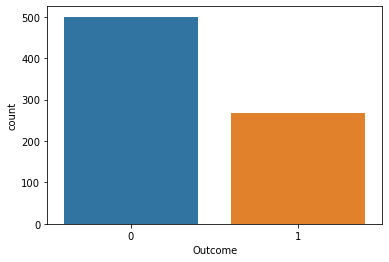

In [8]:
print(data.groupby(["Outcome"]).count())
sns.countplot(data["Outcome"])

# 0=No diabeties, 1=Diabeties

<AxesSubplot:>

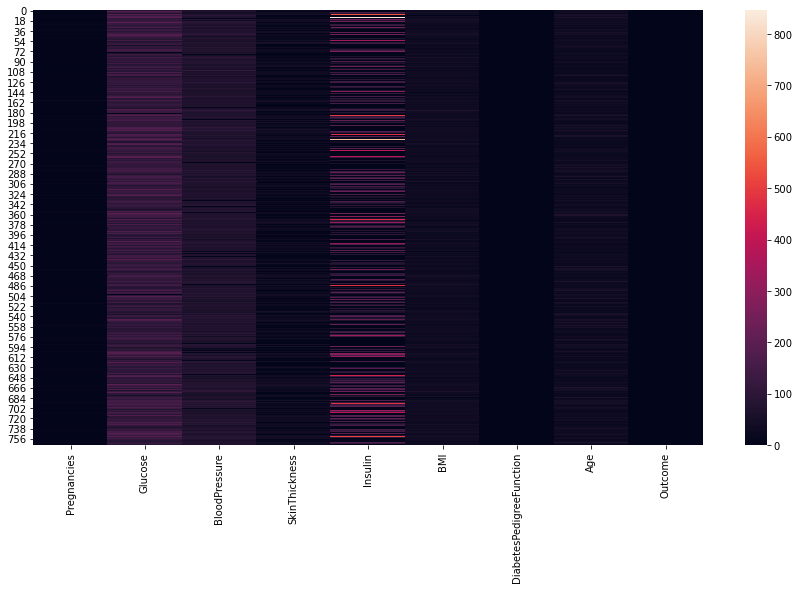

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(data)

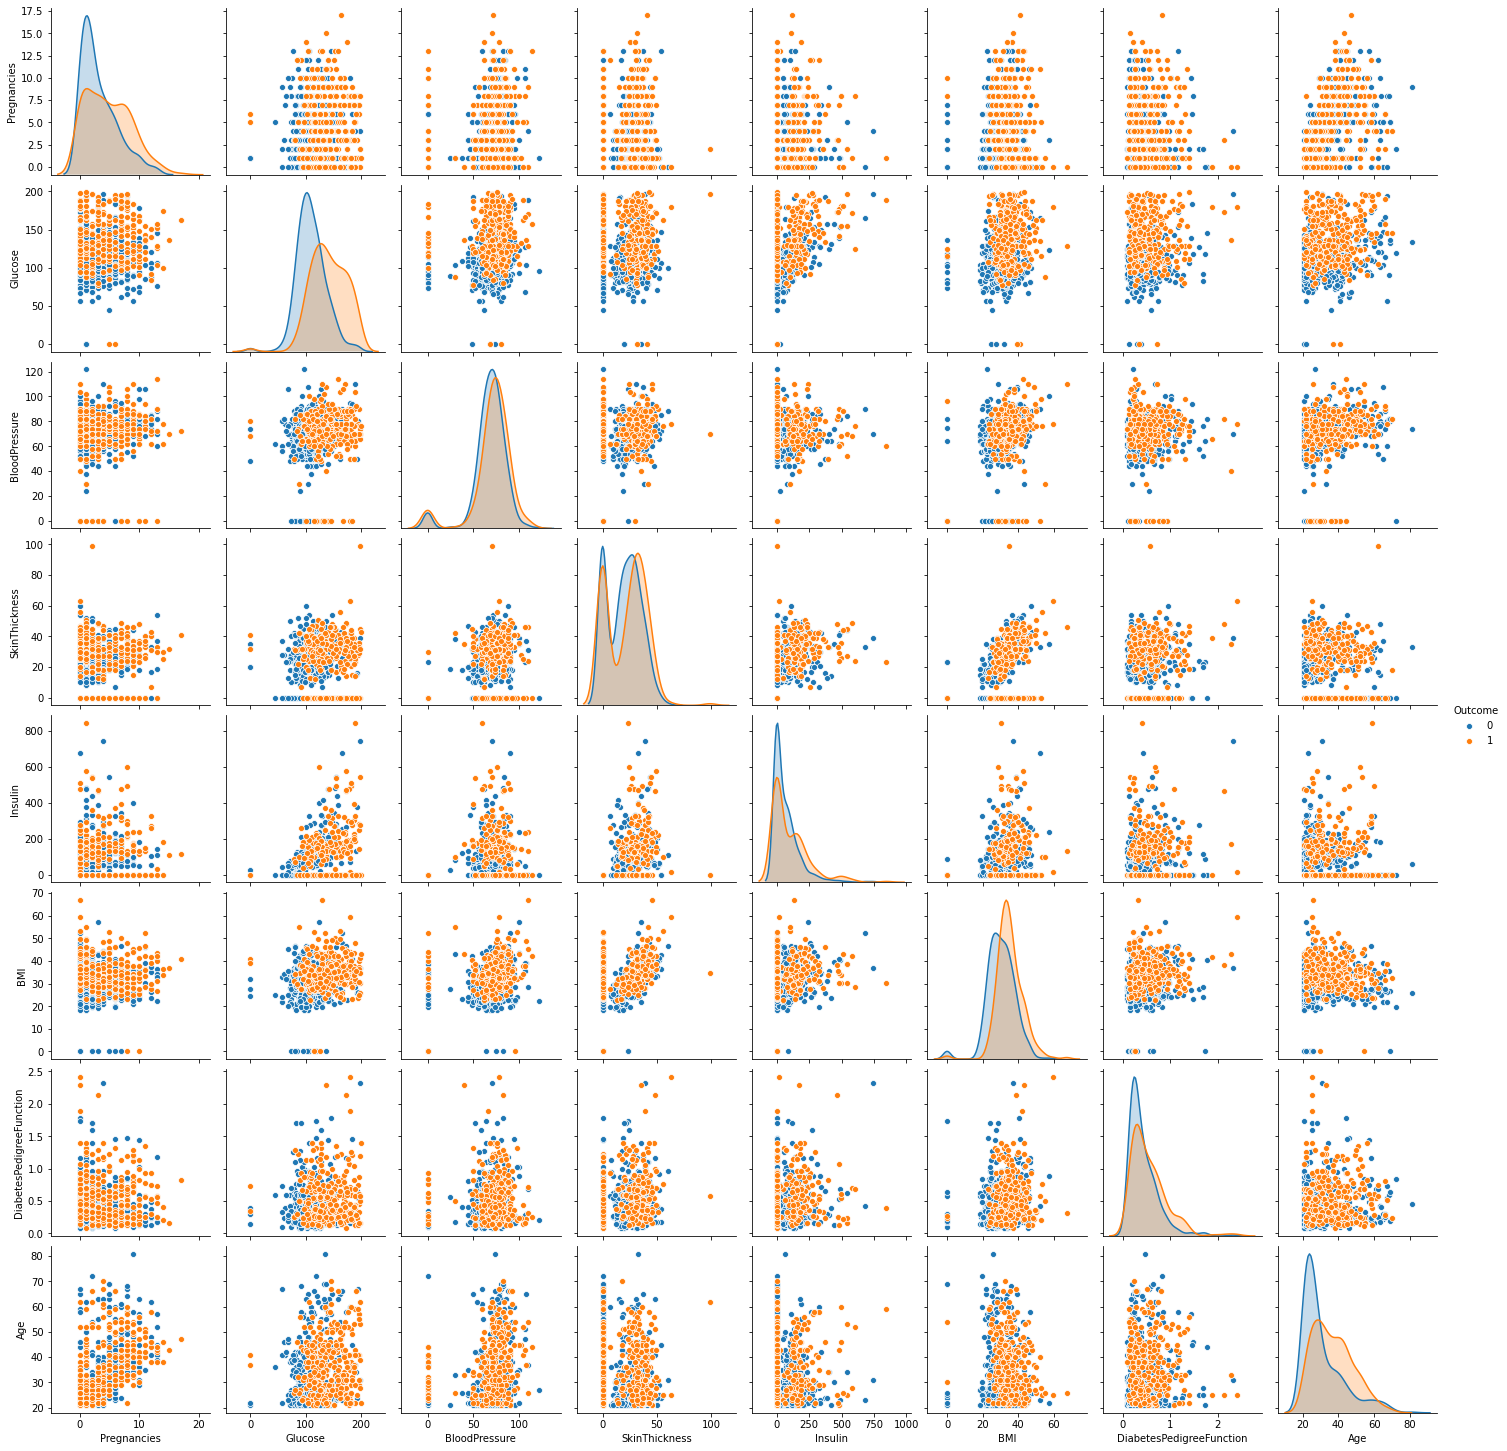

In [10]:
sns.pairplot(data, hue="Outcome")

# Correlation

In [11]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

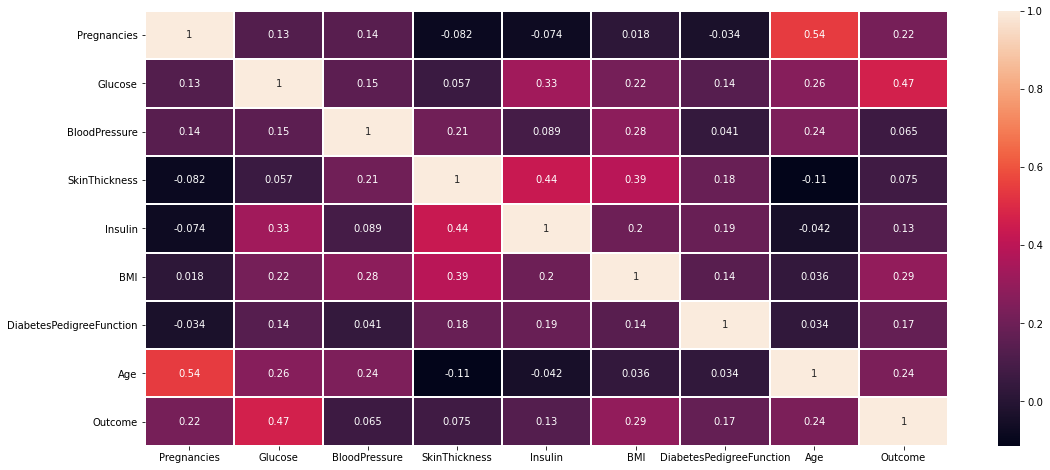

In [12]:
plt.figure(figsize=(18,8))
sns.heatmap(data.corr(), annot=True, linewidths=1)

<AxesSubplot:>

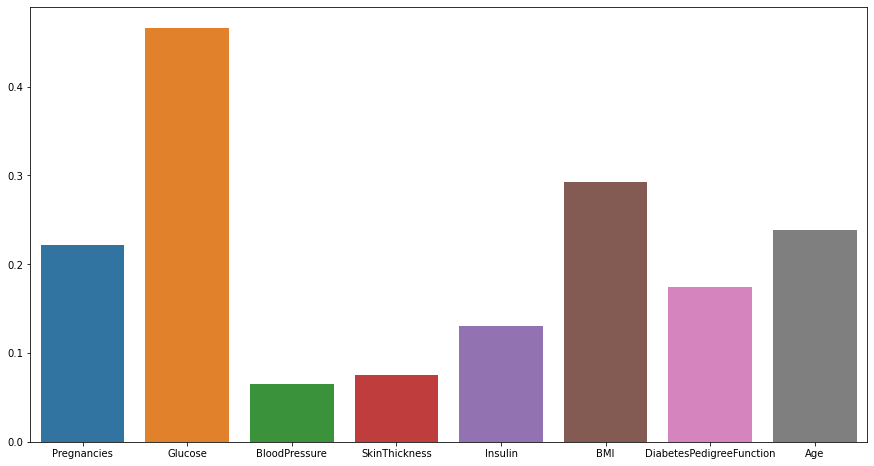

In [13]:
data_2 = data.drop(["Outcome"],axis=1)
plt.figure(figsize=(15,8))
sns.barplot(data_2.corrwith(data.Outcome).index, data_2.corrwith(data.Outcome))

# Splitting the dataset

In [14]:
x_data = data.iloc[:,:8].values
y_data = data.iloc[:,8:].values

In [15]:
impute = SimpleImputer(missing_values=0, strategy="mean")
x_data = impute.fit_transform(x_data)
x_data

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

# Feature Scaling

In [16]:
std_scl = StandardScaler()
std_scl_x = std_scl.fit_transform(x_data)
#std_scl_x

# Train_Test_Splitting

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2, random_state=42)
x_train

array([[  2.        ,  84.        ,  72.40518417, ...,  32.45746367,
          0.304     ,  21.        ],
       [  9.        , 112.        ,  82.        , ...,  28.2       ,
          1.282     ,  50.        ],
       [  1.        , 139.        ,  46.        , ...,  28.7       ,
          0.654     ,  22.        ],
       ...,
       [ 10.        , 101.        ,  86.        , ...,  45.6       ,
          1.136     ,  38.        ],
       [  4.49467275, 141.        ,  72.40518417, ...,  42.4       ,
          0.205     ,  29.        ],
       [  4.49467275, 125.        ,  96.        , ...,  22.5       ,
          0.262     ,  21.        ]])

In [18]:
std_x_train,std_x_test,y_train,y_test = train_test_split(std_scl_x,y_data,test_size=0.2, random_state=42)
std_x_train

array([[-8.38980580e-01, -1.23903883e+00,  1.17557115e-15, ...,
         0.00000000e+00, -5.07006355e-01, -1.04154944e+00],
       [ 1.51518152e+00, -3.18474560e-01,  7.93716417e-01, ...,
        -6.19657367e-01,  2.44666971e+00,  1.42599540e+00],
       [-1.17528945e+00,  5.69212412e-01, -2.18432835e+00, ...,
        -5.46884301e-01,  5.50035182e-01, -9.56461683e-01],
       ...,
       [ 1.85149039e+00, -6.80124808e-01,  1.12461028e+00, ...,
         1.91284532e+00,  2.00573238e+00,  4.04942367e-01],
       [ 2.98702282e-16,  6.34967003e-01,  1.17557115e-15, ...,
         1.44709770e+00, -8.05998104e-01, -3.60847411e-01],
       [ 2.98702282e-16,  1.08930278e-01,  1.95184494e+00, ...,
        -1.44927032e+00, -6.33851340e-01, -1.04154944e+00]])

# Training and Testing the Model

# 1. Logistic Regrassion

In [19]:
# Non standardize data
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
log_predict1 = log_reg.predict(x_test)
print("Accuracy of Non standardize data in Logistic regrassion:",accuracy_score(y_test,log_predict1))

Accuracy of Non standardize data in Logistic regrassion: 0.7857142857142857


c:\users\jay\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\jay\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
# standardize data
slog_reg1 = LogisticRegression()
slog_reg1.fit(std_x_train,y_train)
slog_predict2 = slog_reg1.predict(std_x_test)
print(accuracy_score(y_test,slog_predict2))

0.7597402597402597


c:\users\jay\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# 2. Decission Tree

In [21]:
# Non standardize data
d_tree = DecisionTreeClassifier(random_state=42)
d_tree.fit(x_train,y_train)
d_predict1 = d_tree.predict(x_test)
print("Accuracy of Non standardize data in Deccission Tree Classifier:",accuracy_score(y_test,d_predict1))

Accuracy of Non standardize data in Deccission Tree Classifier: 0.7012987012987013


In [22]:
#  standardize data
sd_tree = DecisionTreeClassifier(random_state=42)
sd_tree.fit(std_x_train,y_train)
sd_predict2 = sd_tree.predict(std_x_test)
print("Accuracy of standardize data in Deccission Tree Classifier:",accuracy_score(y_test,sd_predict2))

Accuracy of standardize data in Deccission Tree Classifier: 0.7012987012987013


# 3. Random Forest

In [23]:
# Non standardize data
r_forest = RandomForestClassifier(n_estimators=100, random_state=42)
r_forest.fit(x_train,y_train)
r_predict1 = r_forest.predict(x_test)
print("Accuracy of Non standardize data in Random Forest Classifier:",accuracy_score(y_test,r_predict1))

c:\users\jay\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy of Non standardize data in Random Forest Classifier: 0.7467532467532467


In [24]:
# standardize data
sr_forest = RandomForestClassifier(n_estimators=100, random_state=42)
sr_forest.fit(std_x_train,y_train)
sr_predict2 = sr_forest.predict(std_x_test)
print("Accuracy of standardize data in Random Forest Classifier:",accuracy_score(y_test,sr_predict2))

c:\users\jay\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy of standardize data in Random Forest Classifier: 0.7532467532467533


# Confusion Matrix


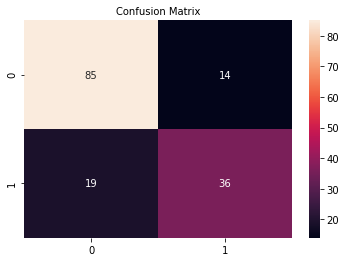

In [25]:
confu_matrix = confusion_matrix(y_test, log_predict1)
plt.title("Confusion Matrix", fontsize=10)
sns.heatmap(confu_matrix, annot=True)
plt.show()

# Cross Validation Check

In [26]:
cross_val = cross_val_score(estimator=log_reg, X=x_train, y=y_train)
print("Cross validation accuracy of Logistic Regrassior: ",cross_val)
print("Cross validation mean accuracy of Logistic Regrassion: ", cross_val.mean())

c:\users\jay\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\jay\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\jay\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d

Cross validation accuracy of Logistic Regrassior:  [0.7398374  0.80487805 0.74796748 0.73170732 0.77868852]
Cross validation mean accuracy of Logistic Regrassion:  0.7606157536985206


c:\users\jay\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
